<a href="https://colab.research.google.com/github/BartekNice31/machine_learning_bootcamp/blob/main/supervised/01_basics/02_szeregi_czasowe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### scikit-learn
Strona biblioteki: [https://scikit-learn.org](https://scikit-learn.org)  

Dokumentacja/User Guide: [https://scikit-learn.org/stable/user_guide.html](https://scikit-learn.org/stable/user_guide.html)

Podstawowa biblioteka do uczenia maszynowego w języku Python.

Aby zainstalować bibliotekę scikit-learn, użyj polecenia poniżej:
```
!pip install scikit-learn
```
Aby zaktualizować do najnowszej wersji bibliotekę scikit-learn, użyj polecenia poniżej:
```
!pip install --upgrade scikit-learn
```
Kurs stworzony w oparciu o wersję `0.22.1`

### Preprocessing danych:
1. [Import bibliotek](#0)
2. [Wygenerowanie danych](#1)
3. [Utworzenie kopii danych](#2)
4. [Zmiana typu danych i wstępna eksploracja](#3)
5. [LabelEncoder](#4)
6. [OneHotEncoder](#5)
7. [Pandas *get_dummies()*](#6)
8. [Standaryzacja - StandardScaler](#7)
9. [Przygotowanie danych do modelu](#8)



In [6]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.preprocessing import LabelEncoder
from pandas.plotting import register_matplotlib_converters
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
sklearn.__version__

'1.6.1'

In [3]:
data = {'price': [108, 109, 110, 110, 109, np.nan, np.nan, 112, 111, 111]}
date_range = pd.date_range(start='01-01-2020 09:00', end='01-01-2020 18:00', periods=10)

df = pd.DataFrame(data=data, index=date_range)
df

,price
2020-01-01 09:00:00,108.0
2020-01-01 10:00:00,109.0
2020-01-01 11:00:00,110.0
2020-01-01 12:00:00,110.0
2020-01-01 13:00:00,109.0
2020-01-01 14:00:00,NaN
2020-01-01 15:00:00,NaN
2020-01-01 16:00:00,112.0
2020-01-01 17:00:00,111.0
2020-01-01 18:00:00,111.0


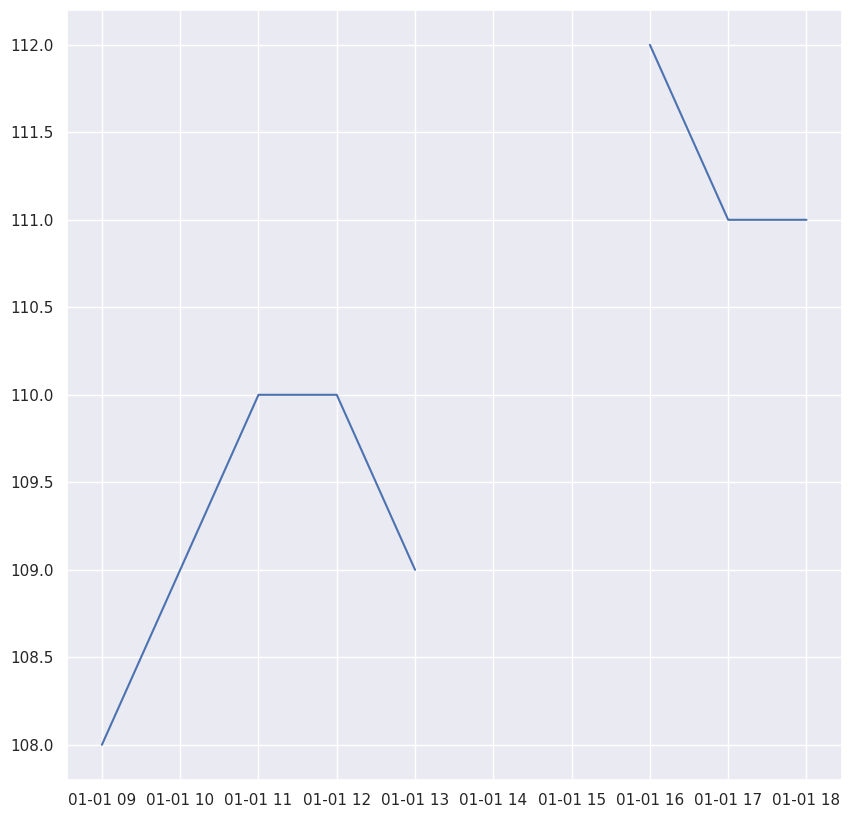

In [9]:
from pandas.plotting import register_matplotlib_converters
import seaborn as sns
import matplotlib.pyplot as plt
register_matplotlib_converters()
sns.set()
plt.figure(figsize=(10,10))
plt.plot(df['price'])

In [12]:
df_plotly=df.reset_index()
px.line(data_frame=df_plotly,x='index',y='price',title='szeregi czasowe: brak danych')

In [13]:
px.line(data_frame=df.reset_index(),x='index',y='price',title='Szeregi czasowe- brak danych')

In [14]:
px.line(data_frame=df.reset_index().dropna(),x='index',y='price',title='Szeregi czasowe- brak danych- df.dropna()')

In [15]:
px.line(data_frame=df.reset_index().fillna(0),x='index',y='price',title='Szeregi czasowe-brak-uzupełnienie 0')

In [16]:
px.line(data_frame=df.reset_index().fillna(df['price'].mean()),x='index',y='price',title='Szeregi czasowe- wstawienie średniej')

In [17]:
px.line(data_frame=df.reset_index().fillna(df['price'].median()),x='index',y='price',title='Szeregi czasowe- wstawienie mediany')

In [21]:
px.line(data_frame=df.assign(
    price_filled=df['price'].interpolate()
).reset_index(),x='index',y='price_filled',title='Szeregi czasowe-brak-interpolacja',width=600,height=400)

In [25]:
px.line(data_frame=df.reset_index().fillna(method='ffill'),x='index',y='price',
        width=800,height=600,title='szeregi czasowe-brak-metoda forward fill')

/tmp/ipython-input-1586996520.py:1: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [26]:
px.line(data_frame=df.reset_index().fillna(method='bfill'),
        x='index',
        y='price',
        width=800,height=600,
        title="Szeregi czasowe-brak-metoda backward fill")

/tmp/ipython-input-27082540.py:1: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

